# Space Invaders - gestion des collisions

[Vidéo d'accompagnement](https://vimeo.com/505748516)

Basiquement, une collision met en jeu deux acteurs qui sont dans une même scène (pour l'instant un `Canevas`).

Pour pouvoir les détecter, il semble naturel de le faire depuis la scène (et non depuis chaque acteur).

Mais pour cela, il faudrait que la scène dispose d'un moyen d'accéder au différents acteurs.

Il semble donc naturel de créer une classe `Scene` qui va hériter de la classe native de tkinter `Canevas`: on crée donc ainsi notre propre *widget*!

Brossons son *interface*:

## La classe `Scene` et son interface

```python
# module space_invaders/scene.py
from tkinter import Canvas

class Scene(Canvas):
    
    def __init__(self, fen):
        super().__init__(fen, width=1000, height=800, bg="black")
        # un «ensemble» - set - pour suivre les acteurs
        self.acteurs = set()
        
        self.gerer_collision()
    
    def creer_acteur(self, acteur):
        pass
    
    def supprimer_acteur(self, acteur):
        pass
    
    def est_en_collision(self, acteur1, acteur2):
        """renvoie True ou False selon que les acteurs sont en collision
        (se recouvrent partiellement) ou non."""
        pass
    
    def gerer_collision(self, delai_milli=50):
        """toutes les 'delai_milli' millisecondes, vérifier si il y a des acteurs
        en collision et agir en conséquence"""
        pass
    
```

Pour pouvoir surveiller les acteurs, il faut savoir quel acteur est en scène. Nous les enregistrerons donc dans un ensemble `set`.

*Note*: Nous aurions pu utiliser une `list` mais c'est plus efficace avec un `set`.

## Les ensembles - `set`

Un ensemble `set` est une sorte de liste spécialisée sans index ... il permet de grouper des «objets» en étant assuré qu'un objet donné n'y figure pas deux fois. Basiquement, si `ens` est un ensemble, son *interface* est:

- `ens = set()`: création d'un ensemble vide,

- `ens.add(objet)`: ajoute `objet` à l'ensemble,

- `ens.discard(objet)`: supprime `objet` de l'ensemble sans produire d'erreur s'il ne s'y trouve pas,

- `len(ens)`: nombre d'objets dans l'ensemble,

- `objet in ens`: renvoie `True` ou `False` selon que `objet` est dans l'ensemble `ens` ou non,

- `for objet in ens: ...`: parcourt l'ensemble `ens`.

Quelques tests:

In [ ]:
class A:
    pass

ens = set()
ob1, ob2, ob3 = A(), A(), A()
print(ob1 is ob2)
print(type(ob1))

ajouter deux fois le même objet ...

In [ ]:
ens.add(ob1)
ens.add(ob1)
ens

supprimer un objet qui n'est pas dans l'ensemble n'a pas d'effet (pas d'erreur!)

In [ ]:
ens.add(ob2)
ens.discard(ob3)
ens

In [ ]:
ens.discard(ob1)
ens

In [ ]:
print(len(ens))
print(ob1 in ens, ob2 in ens)
ens.discard(ob2)
print(len(ens))

In [ ]:
ens.add(ob1)
ens.add(ob3)
for ob in ens:
    print(ob)

## Ajout et modification de la classe `Acteur`

On observe qu'on a souvent besoin des quatres nombres xmin, ymin, xmax, ymax qui correspondent aux coins haut-gauche et bas-droite du rectangle.

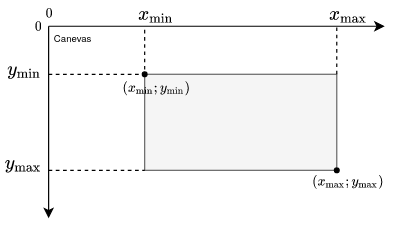

Nous allons donc ajouter une fonction `min_max` qui renvoie ces quatres nombres.

### ajout de la fonction `min_max`

```python
# dans la classe Acteur
def min_max(self):
    """renvoie xmin, ymin, xmax, ymax"""
    x, y = self.pos
    l, h = self.dim
    return ___, ___, ___, ___
```

**Solution**

```python
# dans la classe Acteur
def min_max(self):
    """renvoie xmin, ymin, xmax, ymax"""
    x, y = self.pos
    l, h = self.dim
    return x, y, x + l, y + h
```

On s'aperçoit après réflexion qu'on peut alors simplifier un peu le code (le rendre plus clair) en exploitant cette fonction ainsi que l'interface de la scène.

### réécriture de `est_hors_scene` et `est_dans_scene`

```python
# dans la classe Acteur
def est_hors_scene(self):
    """Test si l'acteur est entièrement hors de la scène"""

    xmin, ymin, xmax, ymax = ___()
    return xmax < 0 or xmin >= self.L or ymax < 0 or ymin >= self.H

def est_dans_scene(self, dx=0, dy=0):
    """Test si l'acteur est entièrement dans la scène,
    après un déplacement (virtulel) dx, dy s'il est précisé"""

    xmin, ymin, xmax, ymax = ___()
    return xmin + dx >= 0 and ___ <= self.L and ___ >= 0 and ___ <= self.H
```

**Solution**

```python
def est_hors_scene(self):
    """Test si l'acteur est entièrement hors de la scène"""

    xmin, ymin, xmax, ymax = self.min_max()
    return xmax < 0 or xmin >= self.L or ymax < 0 or ymin >= self.H

def est_dans_scene(self, dx=0, dy=0):
    """Test si l'acteur est entièrement dans la scène,
    après un déplacement (virtulel) dx, dy s'il est précisé"""

    xmin, ymin, xmax, ymax = self.min_max()
    return xmin + dx >= 0 and xmax + dx <= self.L and ymin + dy >= 0 and ymax + dy <= self.H
```

### Autres modifications

Modifions un peu l'initialisateur par défaut `__init__` (il n'y a que les lignes utiles), ainsi que `supprimer`.

C'est aux fonctions spécialisées de la scène qu'il faut confier la création et la suppression de la figure.

```python
def __init__(self, scene, largeur=100, hauteur=100, couleur="white"):
    # ...
    # ...
    # ...
    self.couleur = couleur

    self.id = self.scene.creer_acteur(self)


def supprimer(self):
    "Efface l'acteur de la scene"

    self.scene.supprimer_acteur(self)
```

## Implémentation de `Scene`

### `creer_acteur` et `supprimer_acteur`

```python
def creer_acteur(self, acteur):
    xmin, ymin, xmax, ymax = acteur.___
    _id = self.create_rectangle(xmin, ___, ___, ___, fill=___.couleur, width=0)
    # mémorisons cet acteur
    self.acteurs.___(acteur)
    return ___
```

**Solution**

```python
def creer_acteur(self, acteur):
    xmin, ymin, xmax, ymax = acteur.min_max()
    _id = self.create_rectangle(xmin, ymin, xmax, ymax, fill=acteur.couleur, width=0)
    # mémorisons cet acteur
    self.acteurs.add(acteur)
    return _id
```

```python
def supprimer_acteur(self, acteur):
    # suppression de l'item graphique
    self.delete(acteur.id)
    # suppression des acteurs en scène
    self.____.discard(____)
```

**Solution**

```python
def supprimer_acteur(self, acteur):
    # suppression de l'item graphique
    self.delete(acteur.id)
    # suppression des acteurs en scène
    self.acteurs.discard(acteur)
```

### Tester!

À ce stade, on devrait pouvoir tester la classe `Scene` et la classe `Acteur` et il faut tester dès que c'est possible!

- on fait toujours des petites erreurs (frappes, oublie d'un self ...)
- ou, plus embêtant, des erreurs de logique dans l'organisation du code.

#### Pour `Scene`

```python
# module space_invaders/scene.py
from tkinter import Tk, Canvas

fen = Tk()
fen.title("space invaders")

class Scene(Canvas):

    # ...

scene = Scene(fen)
scene.pack()

if __name__ == "__main__":
    # Regarder la console...
    fen.mainloop()
```

#### Pour `Acteur`

```python
# module space_invaders/acteur.py
class Acteur:
    #...
    
if __name__ == "__main__":
    from scene import *
    acteur = Acteur(scene)
    acteur.set_position(acteur.L - 50, 100)
    # testons les fonctions modifiées avec min_max
    print("dans scene?", acteur.est_dans_scene())
    print("hors scene?", acteur.est_hors_scene())
    acteur.reagir("<Left>", lambda : acteur.deplacer(-5, 0) )
    acteur.reagir("<Right>", lambda : acteur.deplacer(5, 0) )
    fen.mainloop()
```

### `est_en_collision`

*Aide*: il est plus facile de penser au cas où *les rectangles ne se chevauchent pas*. 

Par exemple si le *premier* se situe dans la **zone à gauche** du *second* alors `x1_max <= x2_min` ...

```python
def est_en_collision(self, acteur1, acteur2):
    """renvoie True ou False selon que les acteurs sont en collision
    (se recouvrent partiellement) ou non."""

    assert acteur1 is not ___

    x1_min, y1_min, x1_max, y1_max = acteur1.____
    x2_min, y2_min, x2_max, y2_max = acteur2.____

    # horizontalement
    # si l'acteur1 est à gauche de l'acteur2
    # ou si c'est le contraire, pas de collision
    if ___ or ___:
        return False

    # verticalement
    if ___ or ___:
        return False

    # dans tous les autres cas: collision!
    return True
```

**Solution**

```python
def est_en_collision(self, acteur1, acteur2):
    """renvoie True ou False selon que les acteurs sont en collision
    (se recouvrent partiellement) ou non."""

    assert acteur1 is not acteur2

    x1_min, y1_min, x1_max, y1_max = acteur1.min_max()
    x2_min, y2_min, x2_max, y2_max = acteur2.min_max()

    # horizontalement
    # si l'acteur1 est à gauche de l'acteur2
    # ou si c'est le contraire, pas de collision
    if x1_max <= x2_min or x2_max <= x1_min:
        return False

    # verticalement
    if y1_max <= y2_min or y2_max <= y1_min:
        return False

    # dans tous les autres cas: collision!
    return True
```

### `gerer_collision`

C'est peut-être la première fois que vous rencontrez des **boucles imbriquées**: une boucle dans une autre boucle.

L'idée c'est de collecter toutes les paires d'acteurs de la scène pour savoir s'ils sont en collision avec `est_en_collision`.

Il va donc falloir parcourir deux fois l'ensemble des acteurs.

```python
def gerer_collision(self, delai_milli=50):
    # un ensemble pour collecter les acteurs en collision
    a_supprimer = ___

    for acteur1 in ___:
        # si cet acteur est dans a_supprimer
        # inutile de s'en occuper!
        if acteur1 in a_supprimer: continue

        for acteur2 in self.acteurs:
            # si acteur2 est identique à acteur1 ou
            # si il est déjà dans a_supprimer,
            #inutile de s'en occuper!
            if acteur1 ___ acteur2 or acteur2 ___ a_supprimer: continue

            # sont-ils en collision ?
            if self.___(acteur1, acteur2):
                # si oui, on les collecte
                ___.add(acteur1)
                ___.add(acteur2)

    # suppression des acteurs collectés
    for acteur in ___:
        acteur.___()

    # ne pas oublier de relancer
    self.___(delai_milli, ___)
```

**Solution**

```python
def gerer_collision(self, delai_milli=50):
    # un ensemble pour collecter les acteurs en collision
    a_supprimer = set()

    for acteur1 in self.acteurs:
        # si cet acteur est dans a_supprimer
        # inutile de s'en occuper! 
        if acteur1 in a_supprimer: continue

        for acteur2 in self.acteurs:
            # si acteur2 est identique à acteur1 ou
            # si il est déjà dans a_supprimer,
            #inutile de s'en occuper!
            if acteur1 is acteur2 or acteur2 in a_supprimer: continue
            
            # sont-ils en collision ?
            if self.est_en_collision(acteur1, acteur2):
                # si oui, on les collecte
                a_supprimer.add(acteur1)
                a_supprimer.add(acteur2)

    # suppression des acteurs collectés
    for a in a_supprimer:
        a.supprimer()

    # ne pas oublier de relancer
    self.after(50, self.gerer_collision)
```

Adapter les autres classes si besoin

### `Missile`

Normalement le fichier missile fonctionne toujours...

### `Hero`

Pareil mais lorsqu'on lance un missile le héro est détruit (par son propre missile!)

C'est en fait plutôt bon signe car on voit que la fonction `gerer_collision` fait son travail!

Pour éviter tout de même de détruire le héro quand on lance le missile, il faut s'assurer que le missile ne le touche pas lorsqu'on tire:

```python
def tirer(self):
    x, y = self.pos
    l, _ = self.dim
    m = Missile(self.scene)
    _, hm = m.dim
    m.set_position(x + l//2, y - hm)
    m.set_vitesse(-300)
    m.lancer()
```

### `Envahisseur`

Tout fonctionne bien à cela près que l'envahisseur continue à tirer après avoir été détruit de même que le héro!!

C'est un **bug** qu'il va falloir régler.

## Correction du bug ...

[Vidéo d'aide pour cette partie](https://vimeo.com/505748143)

Les bugs observés proviennent du fait que lorsqu'on utilise la fonction `after` ou la fonction `bind`, il faut pouvoir les *annuler*.

La documentation de tkinter indique que pour annuler un `after` on utilise [`after_cancel`](http://tkinter.fdex.eu/doc/uwm.html#after_cancel) et pour un`bind` on utilise [`unbind`](http://tkinter.fdex.eu/doc/uwm.html#unbind).

**Le principe**: 

les fonctions `after` et `bind` renvoient toute les deux un *identifiant numérique* que je note `idn`.

Pour **annuler** un `after`, on écrit `after_cancel(idn)` et pour un `bind`, on écrit `unbind(type_evenement, idn)`.



Ainsi, il faudrait *spécialiser* la fonction `supprimer` pour qu'elle s'occupe d'annuler les `after` et les `bind`.

### Pour `Hero`

- Dans son `__init__` remplaçons:
```python
self.reagir('<space>', self.tirer)
```
par 
```python
self._space = self.reagir('<space>', self.tirer)
```
Il faudra aussi modifier `reagir` de façon qu'elle renvoie l'identifiant du `bind`...

- Redéfinissons ensuite la fonction `supprimer` pour `Hero`:
```python
def supprimer(self):
    super().supprimer()
    self.fen.unbind('<space>', self._space)
```

À ce stade, on doit pouvoir vérifier que lorsque le héro est détruit, il ne peut plus tirer!

MAIS en fait on peut toujours le déplacer de gauche à droite même si on ne le voit pas ...

Bref, il faut faire un `unbind` pour chacun des `bind`: ce n'est pas bien long!

### Pour `Envahisseur`

- Dans son `__init__` rajoutons un attribut `self._annul = None`

- Dans `_lancer` remplaçons:
  ```python
  self.scene.after(duree_milli, lambda: self._lancer(duree_milli))
  ```
  par
  ```python
  self._annul = self.scene.after(duree_milli, lambda: self._lancer(duree_milli))
  ```

- Redéfinissons `supprimer`:
```python
  def supprimer(self):
        super().supprimer()
        self.scene.after_cancel(self._annul)
```

## Complément: comment s'assurer qu'un objet est complètement supprimé?

Dans une classe on peut ajouter une fonction spéciale de Python `__del__`.

Dans la classe `Acteur` ajouter:
```python
def __del__(self):
   print(self, " supprimer!")
```

La logique de Python est la suivante: 
- si **plus rien ne référence** un objet (un acteur par exemple), je le détruis automatiquement,
- mais juste avant, j'appelle la fonction `__del__` de l'objet pour le prévenir.

Si la variable `obj` référence un objet, `del obj` détruit cette variable (son nom) mais l'objet n'est pas détruit **sauf si plus rien n'y fait référence**.

Tester ce qui suit pour bien comprendre (une cellule après l'autre):

In [ ]:
class Truc:
    def __del__(self):
        print("je meurs")

In [ ]:
# la variable truc référence un objet de type Truc
truc = Truc()
# on détruit la variable qui était la seul référence vers l'objet
del truc
# l'objet va être détruit par Python.

In [ ]:
truc = Truc()
# On crée une autre référence vers l'objet de type Truc
bidulle = truc
# On détruit la première variable
del truc
# l'objet est-il détruit par Python?

In [ ]:
# l'objet n'est toujours pas détruit, mais si on supprime la seconde variable
del bidulle

In [ ]:
# et si on ne fait aucune référence à l'objet créé?
Truc()
print("passons à autre chose...")

**Quel lien avec nos acteurs???** Nous souhaitons que chaque acteur soit détruit lorsque sa fonction `supprimer` est appelée 

Autrement, de nombreux acteurs vont s'accumuler tout au long du jeu (pensez aux missiles) et le jeu finira par planter (faute de mémoire).

Nous allons pouvoir vérifier si les acteurs sont bien détruits par Python au fur et à mesure grace à la fonction spéciale `__del__` ajoutée à `Acteur`:.

- Pour **Missile**, modifier le code de test en ajoutant `del m` après la dernière boucle `for`. 
 Puis vérifier que tout fonctionne bien et que les missiles dont détruits par Python une fois hors scène.

- Pour **Hero** inutile de créer une variable:
```python
if __name__ == "__main__":
    from scene import *
    Hero(scene)
    fen.mainloop()
```
- même chose pour **Envahisseur**:
```python
if __name__ == "__main__":
    from scene import *
    from hero import Hero
    Envahisseur(scene)
    Hero(scene)
    fen.mainloop()
```

REMARQUES:
- Chaque acteur existe au cours du test car ils sont référencés par la scène (autrement il serait détruit dès le début du test!)
- Lorsqu'on fait `fen.bind`, l'acteur est référencé par la fenêtre et ne peut être détruit par Python sans un `unbind`.
- Lorqu'on fait `scene.after`, l'acteur concerné est référencé par le Canvas sous-jacent à la scène, il ne peut être détruit tant que `after` est appelé d'où la nécessité du `after_cancel`.

**Conclusion**: tout `bind` doit prévoir un `unbind`, tout `after` qui sert à rappeler une fonction régulièrement doit-être arrêté d'une façon ou d'une autre pour que l'objet puisse être détruit.
